In [1]:
import numpy as np
import pandas as pd
from anndata import AnnData
import scanpy as sc

## load the data

In [2]:
data_path = "/home/nas2/biod/yangchenghui/FGOT_scMultiSim_simulation/simulation_data_discrete_4types/"
RNA_data = pd.read_table(data_path+'rna_count.txt', sep='\t', index_col=0)
ATAC_data = pd.read_csv(data_path+'atac_count.txt', sep='\t', index_col=0)

In [3]:
RNA_data

,type1_cell1,type1_cell2,type1_cell3,type1_cell4,type1_cell5,type1_cell6,type1_cell7,type1_cell8,type1_cell9,type1_cell10,...,type4_cell291,type4_cell292,type4_cell293,type4_cell294,type4_cell295,type4_cell296,type4_cell297,type4_cell298,type4_cell299,type4_cell300
gene1,7,13,6,6,3,0,13,0,3,1,...,29,42,3,0,19,1,113,26,108,0
gene2,22,47,50,43,29,25,48,65,55,50,...,56,62,66,55,45,65,53,62,87,73
gene3,0,0,0,0,0,0,0,0,0,0,...,109,118,97,97,83,96,77,95,129,104
gene4,2,20,6,31,9,18,2,5,17,24,...,3,20,0,0,0,0,0,0,0,1
gene5,0,0,0,0,0,0,1,0,0,1,...,10,42,0,1,29,3,0,35,50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene106,21,17,21,16,9,22,10,19,6,25,...,4,3,3,6,1,2,1,2,4,1
gene107,3,6,5,1,5,0,22,30,0,18,...,16,12,15,2,30,20,11,19,16,12
gene108,11,5,3,4,9,2,2,2,4,1,...,33,22,50,59,23,77,34,40,19,69
gene109,61,42,36,33,30,36,35,41,98,42,...,20,10,20,25,5,12,24,10,9,6


In [4]:
ATAC_data

,type1_cell1,type1_cell2,type1_cell3,type1_cell4,type1_cell5,type1_cell6,type1_cell7,type1_cell8,type1_cell9,type1_cell10,...,type4_cell291,type4_cell292,type4_cell293,type4_cell294,type4_cell295,type4_cell296,type4_cell297,type4_cell298,type4_cell299,type4_cell300
peak1,2.024531,3.360963,0.000000,1.644700,1.290557,0.000000,1.977650,0.000000,1.149129,0.338221,...,0.000000,0.000000,0.918911,0.000000,0.118111,1.013397,0.262639,0.000000,0.000000,0.000000
peak2,0.877997,0.363358,0.000000,1.569064,0.000000,0.966260,0.000000,0.000000,1.224059,0.000000,...,0.000000,1.165191,0.000000,4.460705,0.674090,1.066775,2.184493,0.000000,1.639576,0.000000
peak3,1.130702,2.909797,0.981311,2.194583,5.818218,4.437942,1.380705,0.580478,6.367769,0.000000,...,1.047405,0.000000,0.000000,0.000000,0.000000,0.000000,0.094230,1.350590,0.000000,0.000000
peak4,0.000000,1.854650,1.235645,0.628108,0.000000,0.994088,0.970306,0.000000,1.006547,2.378565,...,0.000000,0.345175,0.000000,1.685033,1.703700,0.310386,0.000000,0.000000,0.000000,0.000000
peak5,26.367102,22.395059,23.013625,25.897897,24.812333,25.445835,20.684230,26.682596,21.513875,25.851412,...,5.928444,8.565232,1.230016,2.393353,1.997096,5.616158,0.465208,5.162245,2.265590,4.521931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak326,5.209704,0.000000,0.000000,0.000000,3.281611,0.000000,2.026609,0.000000,0.000000,2.172616,...,5.517656,1.872046,7.347662,5.573965,2.376159,1.810742,6.003059,0.000000,3.227490,5.218494
peak327,6.010522,2.421485,4.815157,4.157383,3.077666,2.669932,4.908022,4.195620,3.177034,5.741994,...,0.000000,0.512606,2.520657,0.000000,0.046168,0.000000,0.711919,0.000000,1.736524,0.000000
peak328,5.060338,4.833334,0.000000,0.825428,2.112770,0.000000,1.071496,2.420243,0.052559,4.505994,...,0.000000,0.000000,0.265402,0.000000,0.000000,2.322065,2.126152,0.000000,0.000000,2.333192
peak329,0.313872,1.248565,0.000000,0.650296,0.000000,0.000000,1.087147,1.206809,0.000000,0.928416,...,0.000000,0.000000,1.358257,1.041849,0.000000,4.086230,1.247384,1.480623,0.000000,0.000000


In [5]:
label = pd.read_csv(data_path+'celltype_info.txt', sep='\t', index_col=0)
label

,cell_id,celltype
cell1,type1_cell1,celltype1
cell2,type1_cell2,celltype1
cell3,type1_cell3,celltype1
cell4,type1_cell4,celltype1
cell5,type1_cell5,celltype1
...,...,...
cell296,type4_cell296,celltype4
cell297,type4_cell297,celltype4
cell298,type4_cell298,celltype4
cell299,type4_cell299,celltype4


## select features of RNA data

In [6]:
RNA_andata = AnnData(RNA_data.T)
RNA_andata.obs['label'] = list(label.celltype)
RNA_andata

AnnData object with n_obs × n_vars = 301 × 110
    obs: 'label'

/home/yangchenghui/anaconda3/envs/env_FGOT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


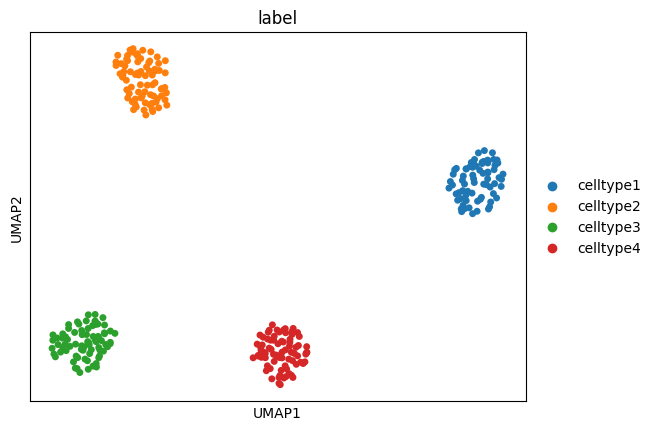

In [7]:
#本身聚类看效果
adata = RNA_andata.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

expr = pd.DataFrame(
    adata.X,
    index=adata.obs_names,   # 细胞名
    columns=adata.var_names  # 基因/特征名
)
expr_T = expr.T
expr_T.to_csv(data_path + "normalized_rna_data.txt")


sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['label'],size=100)

## select features of ATAC data

In [18]:
peak_gene_mt1 = pd.read_csv(data_path+'peak_gene_mt1.txt', sep='\t', index_col=0)
peak_gene_mt2 = pd.read_csv(data_path+'peak_gene_mt2.txt', sep='\t', index_col=0)
peak_gene_mt3 = pd.read_csv(data_path+'peak_gene_mt3.txt', sep='\t', index_col=0)
peak_gene_mt4 = pd.read_csv(data_path+'peak_gene_mt4.txt', sep='\t', index_col=0)

In [29]:
def merge_peak_gene_matrices(*matrices):
    combined = sum((df != 0).astype(int) for df in matrices)
    combined[combined > 0] = 1
    return combined

peak_gene_mt = merge_peak_gene_matrices(peak_gene_mt1, peak_gene_mt2, peak_gene_mt3, peak_gene_mt4)
peak_gene_mt

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene101,gene102,gene103,gene104,gene105,gene106,gene107,gene108,gene109,gene110
peak1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
peak2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
peak3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
peak4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
peak5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
peak327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
peak328,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
peak329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# 检查矩阵中非0的数量
non_zero_count = (peak_gene_mt != 0).sum().sum()
print(non_zero_count)

571


In [31]:
np.random.seed(42)

mt_array = peak_gene_mt.values if isinstance(peak_gene_mt, pd.DataFrame) else peak_gene_mt.copy()
zero_indices = np.argwhere(mt_array == 0)

# 随机选择30%的位置设置为1
num_to_change = int(len(zero_indices) * 0.2)
selected_indices = zero_indices[np.random.choice(len(zero_indices), num_to_change, replace=False)]
for i, j in selected_indices:
    mt_array[i, j] = 1
peak_gene_mt.iloc[:, :] = mt_array

In [32]:
peak_gene_mt

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene101,gene102,gene103,gene104,gene105,gene106,gene107,gene108,gene109,gene110
peak1,0,0,0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
peak2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
peak3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
peak4,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
peak5,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak326,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
peak327,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
peak328,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
peak329,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [33]:
non_zero_count = (peak_gene_mt != 0).sum().sum()
print(non_zero_count)

7716


In [34]:
zero_row_indices = peak_gene_mt[(peak_gene_mt == 0).all(axis=1)].index
zero_row_indices

Index([], dtype='object')

In [35]:
ATAC_andata = AnnData(ATAC_data.T)
ATAC_andata.obs['label'] = list(label.celltype)
ATAC_andata

AnnData object with n_obs × n_vars = 301 × 330
    obs: 'label'

AnnData object with n_obs × n_vars = 301 × 330
    obs: 'label'


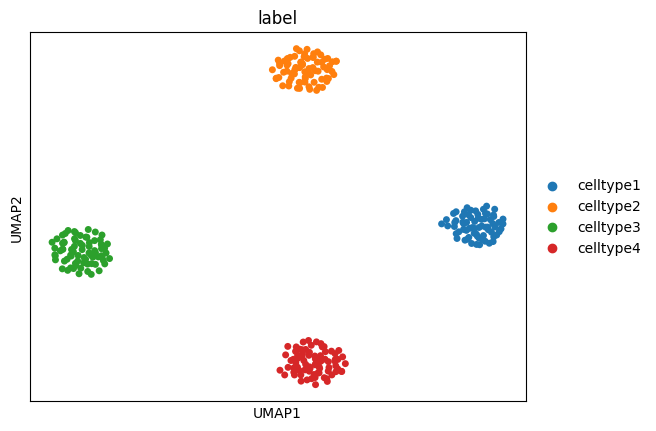

In [ ]:
#本身聚类看效果
adata = ATAC_andata.copy()
adata.obs['label'] = list(label.celltype)
print(adata)

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)


expr = pd.DataFrame(
    adata.X,
    index=adata.obs_names,   # 细胞名
    columns=adata.var_names  # 基因/特征名
)
expr_T = expr.T
expr_T.to_csv(data_path + "normalized_atac_data.txt")

sc.pp.scale(adata)
sc.tl.pca(adata)

# import scglue
# scglue.data.lsi(adata, n_components=50, n_iter=15)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['label'],size=100)